In [503]:
import Barrier, Objective, Newton, Barrier_SVM, helper_function, Kernel_helper, SMO_SVM
reload(Objective), reload(helper_function), reload(Kernel_helper), reload(Newton), reload(Barrier), reload(Barrier_SVM), reload(SMO_SVM)

(<module 'Objective' from '/Users/jaeikjeon/CODE/2020/Numerical_Optimization/SVM_Project/Objective.py'>,
 <module 'helper_function' from '/Users/jaeikjeon/CODE/2020/Numerical_Optimization/SVM_Project/helper_function.py'>,
 <module 'Kernel_helper' from '/Users/jaeikjeon/CODE/2020/Numerical_Optimization/SVM_Project/Kernel_helper.py'>,
 <module 'Newton' from '/Users/jaeikjeon/CODE/2020/Numerical_Optimization/SVM_Project/Newton.py'>,
 <module 'Barrier' from '/Users/jaeikjeon/CODE/2020/Numerical_Optimization/SVM_Project/Barrier.py'>,
 <module 'Barrier_SVM' from '/Users/jaeikjeon/CODE/2020/Numerical_Optimization/SVM_Project/Barrier_SVM.py'>,
 <module 'SMO_SVM' from '/Users/jaeikjeon/CODE/2020/Numerical_Optimization/SVM_Project/SMO_SVM.py'>)

In [1]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from Objective import *
from helper_function import *
from Kernel_helper import *
from Newton import *
from Barrier import *
from Barrier_SVM import *
from SMO_SVM import *


In [505]:
# Load the dataset (MNIST data)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [794]:
# We first classify number 0 and 1
first_label = 0
second_label = 1

N = 500 # number of data will be generated

# Generate the data (labelled with -1 and 1)
x, y = MNIST_ten_to_binary(x_train, y_train, x_test, y_test, first_label, second_label, N)

# Generate the test set
M = 100 # number of train set
test_x, test_y = MNIST_ten_to_binary(x_train, y_train, x_test, y_test, first_label, second_label, M)

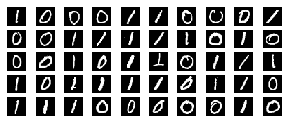

In [804]:
plt.figure(figsize=(5, 2))
for n in range(50):
    plt.subplot(5, 10, n+1)
    plt.imshow(test_x[n].reshape(28,28),
               interpolation="None",
               cmap='gray')
    plt.axis('off')
plt.show()

In [860]:
alpha_0 = ((y==-1) * np.count_nonzero(y==1) + (y==1) * np.count_nonzero(y==-1))/10000
alpha_0 = alpha_0[np.newaxis]
alpha_0 = alpha_0.T
# alpha_0 = np.ones(len(y))[np.newaxis].T/100000
alpha_0.shape

(200, 1)

In [861]:
gamma = 0.0000001 # RBF hyperparameter
D = calc_D(x,y, gamma, "RBF")

In [862]:
C = 0.1 # controls the balance between the margin and empirical loss
F = f(alpha_0, D, C) # the objective function

In [889]:
# Line search hyperparameters
rho = 0.5
c = 1e-4 

epsilon = 1e-7

# Linear constraint matrix
A = y.reshape(-1,1)

newton = Centering_by_Newton(F, A.T, c, rho, epsilon)
alpha, hist = Barrier(F, newton, 10000, len(y), 4, 1e-8) # solve for $\alpha$

Iter 2: f* = [[-68332570.44446298]]
Iter 3: f* = [[-6.83533418e+11]]


In [855]:
alpha, hist = Barrier(F, newton, 10000, len(y), 4, 1e-8) # solve for $\alpha$
plt.plot(hist)

Iter 2: f* = [[-270876.55817478]]
Iter 3: f* = [[-1088926.69763561]]
Iter 4: f* = [[-4361127.25547893]]
Iter 5: f* = [[-17449929.4868522]]
Iter 6: f* = [[-69805138.41234526]]
Iter 7: f* = [[-2.79225974e+08]]
Iter 8: f* = [[-1.11690932e+09]]
Iter 9: f* = [[-4.46764269e+09]]
Iter 10: f* = [[-1.78705762e+10]]
Iter 11: f* = [[-7.14823101e+10]]
Iter 12: f* = [[-2.85929246e+11]]


In [890]:
barr_svm = Barrier_SVM_Classifier(alpha, D, x, y, gamma)
print('Training Accuracy of Binary SVM using Barrier method with RBF kernel =', barr_svm.accuracy(x, y))
print('Test Accuracy of Binary SVM using Barrier method with RBF kernel =', barr_svm.accuracy(test_x, test_y))

Training Accuracy of Binary SVM using Barrier method with RBF kernel = 0.995
Test Accuracy of Binary SVM using Barrier method with RBF kernel = 1.0


In [801]:
print('Training Accuracy of Binary SVM using Barrier method with RBF kernel =', barr_svm.accuracy(x, y))
print('Test Accuracy of Binary SVM using Barrier method with RBF kernel =', barr_svm.accuracy(test_x, test_y))

Training Accuracy of Binary SVM using Barrier method with RBF kernel = 1.0
Test Accuracy of Binary SVM using Barrier method with RBF kernel = 1.0


In [802]:
print('Training Accuracy of Binary SVM using Barrier method with Polynomial kernel =', barr_svm.accuracy(x, y))
print('Test Accuracy of Binary SVM using Barrier method with Polynomial kernel =', barr_svm.accuracy(test_x, test_y))

Training Accuracy of Binary SVM using Barrier method with Polynomial kernel = 1.0
Test Accuracy of Binary SVM using Barrier method with Polynomial kernel = 1.0


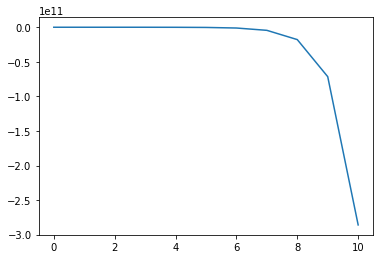

In [803]:
plt.plot(hist)

In [750]:
import SMO_SVM
import Objective
import Kernel_helper
reload(SMO_SVM)
reload(Objective)
reload(Kernel_helper)
from SMO_SVM import *
from Kernel_helper import *
from Objective import *

In [755]:
C = 0.1 # controls the balance between the margin and empirical loss

d = 2 # when kernel is Polynomial
gamma = 0.0000001 # RBF hyperparameter

# when kernel is RBF
max_passes = 2

kernel_set = ["Polynomial", "RBF"]

In [762]:
kernel_type = kernel_set[1] # Choose the kernel

if kernel_type == "Polynomial":
    kernel_hyperparameter = 2
elif kernel_type == "RBF":
    kernel_hyperparameter = 0.000001

In [763]:
D = calc_D(x, y, kernel_hyperparameter, kernel_type) # Calculate the matrix D

F = f(alpha_0, D, C) # the objective function

smo_svm = SMO_SVM_Classifier(F, x, y, kernel_hyperparameter, max_passes, C, kernel_type)

Iter 0: f* = [[0.]]
Iter 1: f* = [[0.]]
Iter 2: f* = [[0.]]
Iter 3: f* = [[0.]]
Iter 19: f* = [[-1.00564643]]
Iter 45: f* = [[-1.00564643]]
Iter 46: f* = [[-1.93107256]]
Iter 84: f* = [[-2.90875735]]
Iter 107: f* = [[-2.90875735]]
Iter 108: f* = [[-3.56297557]]
Iter 111: f* = [[-3.56297557]]
Iter 112: f* = [[-3.56297557]]
Iter 19: f* = [[-4.44949824]]
Iter 21: f* = [[-4.97815038]]
Iter 84: f* = [[-5.42161546]]
Iter 85: f* = [[-5.79055266]]
Iter 87: f* = [[-5.79055266]]
-2.220446049250313e-16


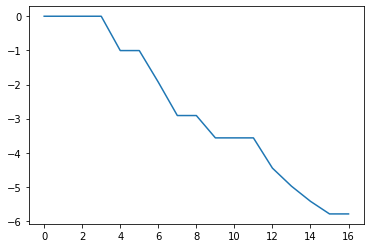

In [714]:
# RBF kernel with SMO
smo_svm.train()
smo_svm.plot_objective_value()

In [768]:
# RBF
print('Training Accuracy of Binary SVM using simplified SMO method with RBF kernel =', smo_svm.accuracy(x, y))
print('Test Accuracy of Binary SVM using simplfied SMO method with RBF kernel =', smo_svm.accuracy(test_x, test_y))

Training Accuracy of Binary SVM using simplified SMO method with RBF kernel = 0.995
Test Accuracy of Binary SVM using simplfied SMO method with RBF kernel = 0.99


Iter 0: f* = [[0.]]
Iter 3: f* = [[-2.18777708e-14]]
Iter 154: f* = [[-5.89713002e-14]]
Iter 161: f* = [[-8.54791059e-14]]
Iter 165: f* = [[-8.54791059e-14]]
0.0


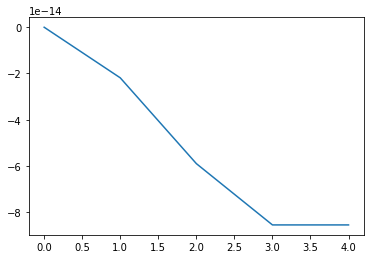

In [711]:
# Polynomial kernel with SMO
smo_svm.train()
smo_svm.plot_objective_value()

In [761]:
# Polynomial
print('Training Accuracy of Binary SVM using simplified SMO method with Polynomial kernel =', smo_svm.accuracy(x, y))
print('Test Accuracy of Binary SVM using simplfied SMO method with Polynomial kernel =', smo_svm.accuracy(test_x, test_y))

Training Accuracy of Binary SVM using simplified SMO method with Polynomial kernel = 1.0
Test Accuracy of Binary SVM using simplfied SMO method with Polynomial kernel = 1.0


Iter 2: f* = [[-32094.06101746]]
Iter 3: f* = [[-1705614.17603661]]
Iter 4: f* = [[-85381619.92699407]]
Iter 5: f* = [[-4.26918191e+09]]
Iter 6: f* = [[-2.13459196e+11]]


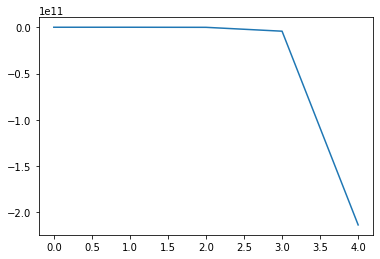

In [896]:
alpha, hist = Barrier(F, newton, 100, len(y), 50, 1e-8) # solve for $\alpha$
plt.plot(hist)

Iter 2: f* = [[-681010.02398407]]
Iter 3: f* = [[-6.83067375e+08]]
Iter 4: f* = [[-6.83069433e+11]]


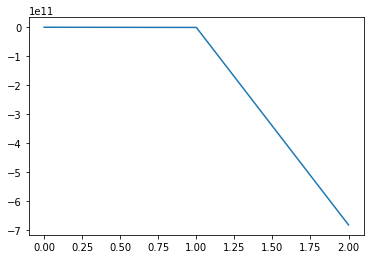

In [898]:
alpha, hist = Barrier(F, newton, 100, len(y), 1000, 1e-8) # solve for $\alpha$
plt.plot(hist)

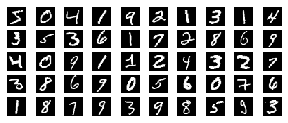

In [900]:
plt.figure(figsize=(5, 2))
for n in range(50):
    plt.subplot(5, 10, n+1)
    plt.imshow(x_train[n],
               interpolation="None",
               cmap='gray')
    plt.axis('off')
plt.show()